In [1]:
import pickle
# IMPORTING PACKAGES AND LIBRARIES
import pandas as pd
import numpy as np
import os
import csv

# train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# imbalance
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# SMOTE
from imblearn.over_sampling import SMOTE

# Data preprocessing
from sklearn.preprocessing import StandardScaler

# Feature selection
from sklearn.feature_selection import mutual_info_regression, SelectPercentile, SelectKBest, RFE, RFECV, chi2
from sklearn.feature_selection import VarianceThreshold
# Thuật toán classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier,StackingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC, NuSVC, SVC, SVR
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier, RidgeClassifierCV, SGDClassifier
from xgboost import XGBClassifier

# Thuật toán linear
from sklearn.linear_model import Lasso

# KFold cv
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold, RepeatedStratifiedKFold, ShuffleSplit

# Vẽ auc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, f1_score, confusion_matrix, classification_report

# Normalization
from sklearn.preprocessing import MaxAbsScaler,MinMaxScaler,StandardScaler

# Turn off warning
import warnings
warnings.filterwarnings("ignore")
# SHAP analysis
import shap

In [3]:
loaded_model = pickle.load(open(r"F:\tat_ca_drug_food\dfi\best_model\random_forest_model_after_tuning.sav", 'rb'))
# result = loaded_model.score(X_test, y_test)
# print(result)

In [8]:
# TRAINING SET
X_train = pd.read_csv(r"F:\tat_ca_drug_food\dfi\DATASET\training_set\5_optimal_features\X_train_SUP.csv")
X_test = pd.read_csv(r"F:\tat_ca_drug_food\dfi\DATASET\training_set\5_optimal_features\X_test_SUP.csv")
y_train = pd.read_csv(r"F:\tat_ca_drug_food\dfi\DATASET\training_set\5_optimal_features\y_train_SUP.csv")
y_test = pd.read_csv(r"F:\tat_ca_drug_food\dfi\DATASET\training_set\5_optimal_features\y_test_SUP.csv")
# result = loaded_model.score(X_test, y_test)
# print(result)

In [4]:
#External test set
X_tst = pd.read_csv(r"F:\tat_ca_drug_food\dfi\DATASET\ext_tst_set\external_test_set_5_features_no_labels.csv")
y_tst = pd.read_csv(r"F:\tat_ca_drug_food\dfi\DATASET\ext_tst_set\external_labels.csv")

In [25]:
# Internal test set
y_int = pd.read_csv(r"F:\tat_ca_drug_food\dfi\DATASET\internal_validation_set\internal_labels.csv")
X_int = pd.read_csv(r"F:\tat_ca_drug_food\dfi\DATASET\internal_validation_set\internal_test_set_5_features.csv")

In [19]:
# Covid-19 drugs set
y_cov = pd.read_csv(r"F:\tat_ca_drug_food\dfi\DATASET\covid_set\covid_set_labels.csv")
X_cov = pd.read_csv(r"F:\tat_ca_drug_food\dfi\DATASET\covid_set\covid_set_5features_no_labels.csv")

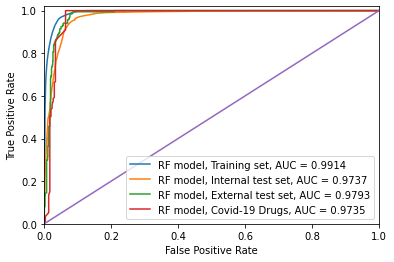

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

#Training
y_pred_proba1 = loaded_model.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = roc_curve(y_test,  y_pred_proba1)
auc1 = roc_auc_score(y_test, y_pred_proba1)
plt.plot(fpr1,tpr1,label="RF model, Training set, AUC = {0:.4f}".format(auc1))

# Internal
y_pred_proba2 = loaded_model.predict_proba(X_int)[::,1]
fpr2, tpr2, _ = roc_curve(y_int,  y_pred_proba2)
auc2 = roc_auc_score(y_int, y_pred_proba2)
plt.plot(fpr2,tpr2,label="RF model, Internal test set, AUC = {0:.4f}".format(auc2))

# External
y_pred_proba3 = loaded_model.predict_proba(X_tst)[::,1]
fpr3, tpr3, _ = roc_curve(y_tst,  y_pred_proba3)
auc3 = roc_auc_score(y_tst, y_pred_proba3)
plt.plot(fpr3,tpr3,label="RF model, External test set, AUC = {0:.4f}".format(auc3))

# Covid
y_pred_proba4 = loaded_model.predict_proba(X_cov)[::,1]
fpr4, tpr4, _ = roc_curve(y_cov,  y_pred_proba4)
auc4 = roc_auc_score(y_cov, y_pred_proba4)
plt.plot(fpr4,tpr4,label="RF model, Covid-19 Drugs, AUC = {0:.4f}".format(auc4))


# plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1.02])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("Various_sets_AUC.png",format="png",dpi=300)
plt.show()



In [18]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

etc = ExtraTreeClassifier()
etc.fit(X_train,y_train)

xgb = XGBClassifier()
xgb.fit(X_train,y_train)


[21:42:18] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

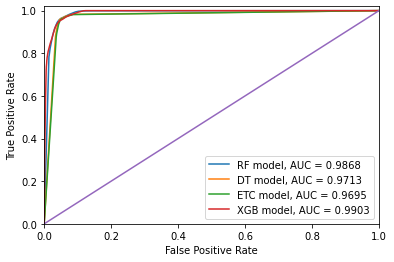

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score

#Training
y_pred_proba1 = loaded_model.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = roc_curve(y_test,  y_pred_proba1)
auc1 = roc_auc_score(y_test, y_pred_proba1)
plt.plot(fpr1,tpr1,label="RF model, AUC = {0:.4f}".format(auc1))

# Internal
y_pred_proba2 = dt.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = roc_curve(y_test,  y_pred_proba2)
auc2 = roc_auc_score(y_test, y_pred_proba2)
plt.plot(fpr2,tpr2,label="DT model, AUC = {0:.4f}".format(auc2))

# External
y_pred_proba3 = etc.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = roc_curve(y_test,  y_pred_proba3)
auc3 = roc_auc_score(y_test, y_pred_proba3)
plt.plot(fpr3,tpr3,label="ETC model, AUC = {0:.4f}".format(auc3))

# Covid
y_pred_proba4 = xgb.predict_proba(X_test)[::,1]
fpr4, tpr4, _ = roc_curve(y_test,  y_pred_proba4)
auc4 = roc_auc_score(y_test, y_pred_proba4)
plt.plot(fpr4,tpr4,label="XGB model, AUC = {0:.4f}".format(auc4))


# plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1.02])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("Various_models_AUC.png",format="png",dpi=300)
plt.show()

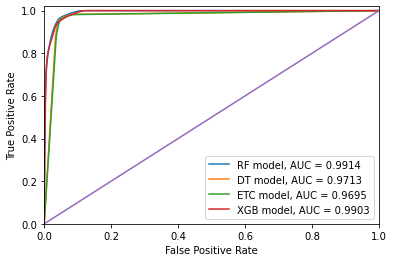

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score

#Training
y_pred_proba1 = best_random.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = roc_curve(y_test,  y_pred_proba1)
auc1 = roc_auc_score(y_test, y_pred_proba1)
plt.plot(fpr1,tpr1,label="RF model, AUC = {0:.4f}".format(auc1))

# Internal
y_pred_proba2 = dt.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = roc_curve(y_test,  y_pred_proba2)
auc2 = roc_auc_score(y_test, y_pred_proba2)
plt.plot(fpr2,tpr2,label="DT model, AUC = {0:.4f}".format(auc2))

# External
y_pred_proba3 = etc.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = roc_curve(y_test,  y_pred_proba3)
auc3 = roc_auc_score(y_test, y_pred_proba3)
plt.plot(fpr3,tpr3,label="ETC model, AUC = {0:.4f}".format(auc3))

# Covid
y_pred_proba4 = xgb.predict_proba(X_test)[::,1]
fpr4, tpr4, _ = roc_curve(y_test,  y_pred_proba4)
auc4 = roc_auc_score(y_test, y_pred_proba4)
plt.plot(fpr4,tpr4,label="XGB model, AUC = {0:.4f}".format(auc4))


# plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1.02])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("Various_models_AUC_tuning.png",format="png",dpi=300)
plt.show()

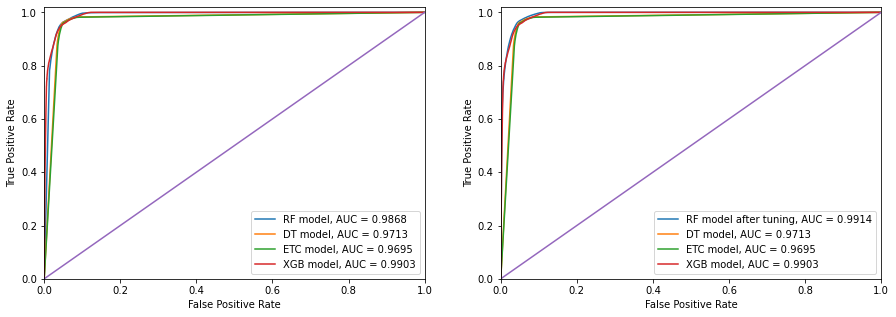

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
#Training
y_pred_proba11 = loaded_model.predict_proba(X_test)[::,1]
fpr11, tpr11, _ = roc_curve(y_test,  y_pred_proba11)
auc11 = roc_auc_score(y_test, y_pred_proba11)
plt.plot(fpr11,tpr11,label="RF model, AUC = {0:.4f}".format(auc11))

# Internal
y_pred_proba21 = dt.predict_proba(X_test)[::,1]
fpr21, tpr21, _ = roc_curve(y_test,  y_pred_proba21)
auc21 = roc_auc_score(y_test, y_pred_proba21)
plt.plot(fpr21,tpr21,label="DT model, AUC = {0:.4f}".format(auc21))

# External
y_pred_proba31 = etc.predict_proba(X_test)[::,1]
fpr31, tpr31, _ = roc_curve(y_test,  y_pred_proba31)
auc31 = roc_auc_score(y_test, y_pred_proba31)
plt.plot(fpr31,tpr31,label="ETC model, AUC = {0:.4f}".format(auc31))

# Covid
y_pred_proba41 = xgb.predict_proba(X_test)[::,1]
fpr41, tpr41, _ = roc_curve(y_test,  y_pred_proba41)
auc41 = roc_auc_score(y_test, y_pred_proba41)
plt.plot(fpr41,tpr41,label="XGB model, AUC = {0:.4f}".format(auc41))


# plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1.02])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


plt.subplot(1, 2, 2)
#Training
y_pred_proba12 = best_random.predict_proba(X_test)[::,1]
fpr12, tpr12, _ = roc_curve(y_test,  y_pred_proba12)
auc12 = roc_auc_score(y_test, y_pred_proba12)
plt.plot(fpr12,tpr12,label="RF model after tuning, AUC = {0:.4f}".format(auc12))

# Internal
y_pred_proba22 = dt.predict_proba(X_test)[::,1]
fpr22, tpr22, _ = roc_curve(y_test,  y_pred_proba22)
auc22 = roc_auc_score(y_test, y_pred_proba22)
plt.plot(fpr22,tpr22,label="DT model, AUC = {0:.4f}".format(auc22))

# External
y_pred_proba32 = etc.predict_proba(X_test)[::,1]
fpr32, tpr32, _ = roc_curve(y_test,  y_pred_proba32)
auc32 = roc_auc_score(y_test, y_pred_proba32)
plt.plot(fpr32,tpr32,label="ETC model, AUC = {0:.4f}".format(auc32))

# Covid
y_pred_proba42 = xgb.predict_proba(X_test)[::,1]
fpr42, tpr42, _ = roc_curve(y_test,  y_pred_proba42)
auc42 = roc_auc_score(y_test, y_pred_proba42)
plt.plot(fpr42,tpr42,label="XGB model, AUC = {0:.4f}".format(auc42))


# plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1.02])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.savefig("Various_models_AUC_comparison.png",format="png",dpi=300)
plt.show()